# Project Description and Goals
Across the United States, there are altercations that result in killings by police officers, whether on-duty or off-duty. Each case is considered as a person dying from being shot, beaten, restrained, intentionally hit by a police vehicle, pepper sprayed, tasered, or otherwise harmed by police. 

For our capstone, we are addressing the issue of police violence that has become a heated topic throughout the country in the recent years. As a team, we will be attempting to help law enforcement agencies spot risk factors so they may step in before risk transforms into actual harm.  

The open-sourced dataset we acquired from [Mapping Police Violence](https://mappingpoliceviolence.org/aboutthedata) has gathered over 9000 police killings from January 2013 to May 2021. Top drivers of civilian fatalities identified will shed light on changes to be made to save more lives. Then, we will use the features to apply to our classification models predicting the threat level of the victim (attacker or not).

### Objectives for this project include:
- Identifying the drivers of civilian fatalities. 
- Documenting the process and analysis throughout the data science pipeline.
- Constructing a classification model that can predict what the victim's threat level is, given the features of the dataset.
- Deliverables:
    - README.md file containing overall project information. 
    - A well-documented jupyter notebook detailing the data science pipeline process.
    - Python modules that automate the data acquisition, preparation, and exploration process.

### Pipeline Process:
1. Acquire
2. Prepare
3. Explore
4. Model/Evaluate
5. Deliver

### Initial Hypotheses:
- How many fatalities happened as a result of an attack by the civilian? (alleged threat level)
- What are the fatalities by state: % killings vs pop
- Is race a factor?
- Does the police officer having a bodycam make a difference?
- Where and what areas result in more killings?
- What is happening in suburban fatalities?
- Do symptoms of mental illness play a role in threat level?


***
### Project Imports

In [1]:
import pandas as pd
import numpy as np

# Helper Functions
import wrangle as w 

# Visualizations
import seaborn as sns
import matplotlib.pyplot as plt

# Hypothesis tests
from scipy import stats
from scipy.stats import chi2_contingency
from scipy.stats import ttest_1samp
from scipy.stats import ttest_ind

# Split data
from sklearn.model_selection import train_test_split

# Evaluate models
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_recall_fscore_support 

# Create models for classification ML:
# Decision Tree  
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz

# Random Forest
from sklearn.ensemble import RandomForestClassifier

# K-Nearest Neighbor(KNN)  
from sklearn.neighbors import KNeighborsClassifier

# Logistic Regression
from sklearn.linear_model import LogisticRegression

***
# Data Acquisition


In [2]:
# acquire data from MPV website's downloaded dataset
df = pd.read_excel('data.xlsx')
df.head()

,Victim's name,Victim's age,Victim's gender,Victim's race,URL of image of victim,Date of Incident (month/day/year),Street Address of Incident,City,State,Zipcode,...,Unnamed: 39,Unnamed: 40,Unnamed: 41,Unnamed: 42,Unnamed: 43,Unnamed: 44,Unnamed: 45,Unnamed: 46,Unnamed: 47,Unnamed: 48
0,Kalon Horton,29,Male,Black,NaN,2021-05-09,NaN,Lancaster,TX,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Name withheld by police,NaN,Male,Unknown Race,NaN,2021-05-09,90 S. Main St.,Leicester,MA,1524.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Jeffrey Mark Murray,62,Male,Unknown Race,NaN,2021-05-09,NaN,Greenville,SC,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Everton Brown,56,Male,Unknown Race,NaN,2021-05-08,NaN,Baltimore,MD,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Felix Jerry Marquez,34,Male,Hispanic,NaN,2021-05-08,NaN,Riverside,CA,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN



### Initial Data Summarization

In [3]:
# rows and columns
df.shape

(9147, 49)

In [4]:
# list of column names and data types with information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9147 entries, 0 to 9146
Data columns (total 49 columns):
 #   Column                                                                                                                                                                      Non-Null Count  Dtype         
---  ------                                                                                                                                                                      --------------  -----         
 0   Victim's name                                                                                                                                                               9147 non-null   object        
 1   Victim's age                                                                                                                                                                9138 non-null   object        
 2   Victim's gender                                         

In [5]:
# check nulls
df.isnull().sum()

Victim's name                                                                                                                                                                    0
Victim's age                                                                                                                                                                     9
Victim's gender                                                                                                                                                                 10
Victim's race                                                                                                                                                                    0
URL of image of victim                                                                                                                                                        4265
Date of Incident (month/day/year)                                                                        

In [6]:
# specify useless columns and what to exclude for counts
useless_columns = df.columns[35:]
exclusions = ["Victim's name", 
"URL of image of victim", 
"Date of Incident (month/day/year)", 
"Street Address of Incident", 
"City", "State", "Zipcode", "County", 
"Agency responsible for death", "ORI Agency Identifier (if available)", 
"A brief description of the circumstances surrounding the death", 
"Link to news article or photo of official document", 
"Link to news article or photo of official document", 
"WaPo ID (If included in WaPo database)", 
"MPV ID", 
"Fatal Encounters ID", 
"Names of Officers Involved (DRAFT)"]

# getting value counts for specific columns
for column in df.columns:
    if column not in exclusions and column not in useless_columns:
        print(column.upper())
        print(df[column].value_counts())
        print("-------------------------------------")

VICTIM'S AGE
Unknown    331
25         299
27         294
31         290
28         289
          ... 
88           1
93           1
95           1
107          1
40s          1
Name: Victim's age, Length: 89, dtype: int64
-------------------------------------
VICTIM'S GENDER
Male           8668
Female          453
Transgender       9
Unknown           6
Male              1
Name: Victim's gender, dtype: int64
-------------------------------------
VICTIM'S RACE
White                     3993
Black                     2306
Hispanic                  1631
Unknown Race               896
Asian                      135
Native American            130
Pacific Islander            52
Unknown race                 2
Hispanic                     1
Asian/Pacific Islander       1
Name: Victim's race, dtype: int64
-------------------------------------
CAUSE OF DEATH
Gunshot                                    8434
Gunshot, Taser                              273
Taser                                     

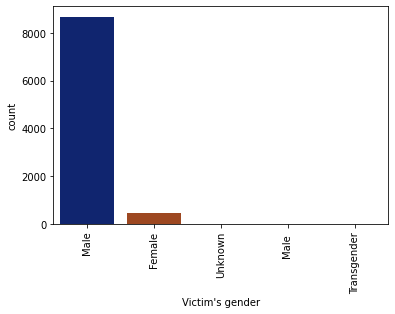

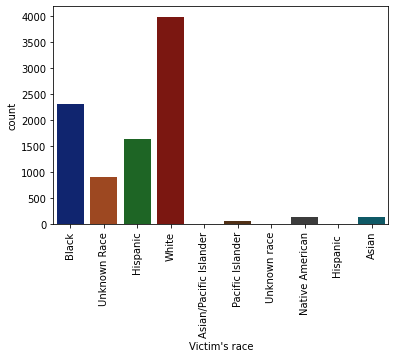

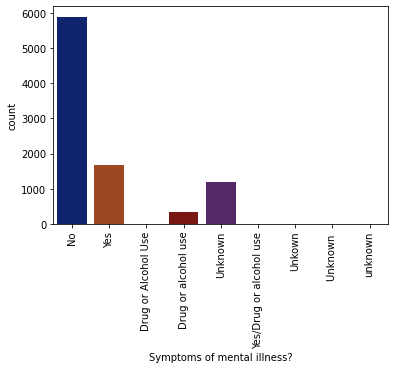

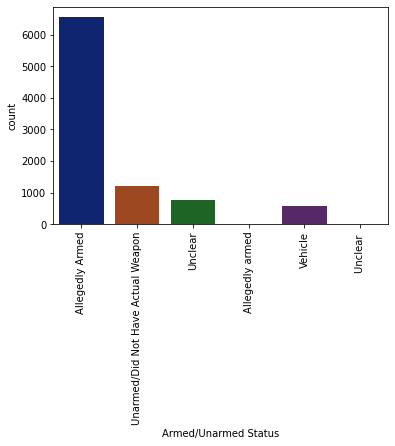

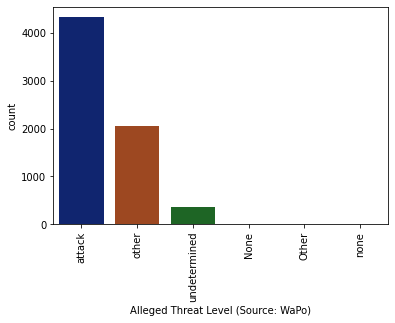

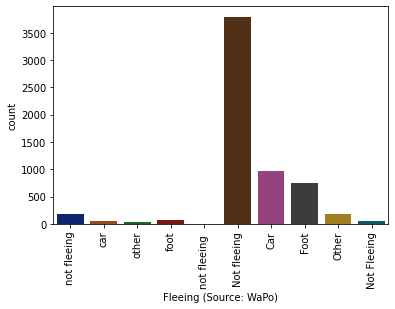

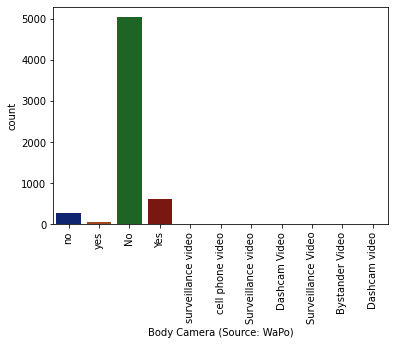

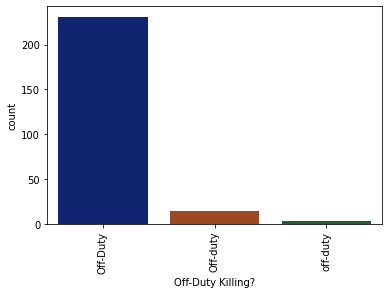

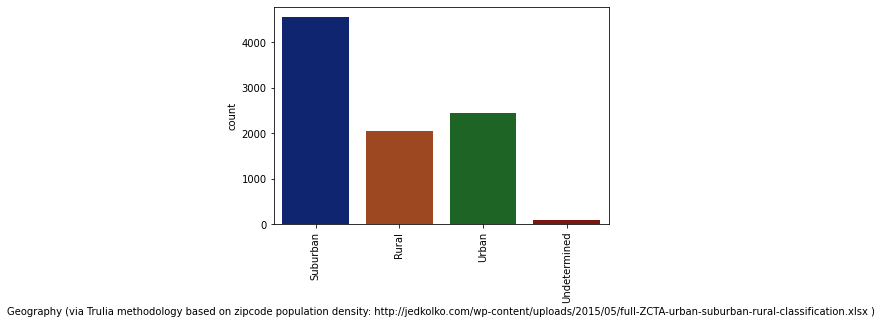

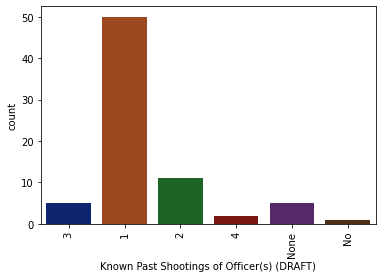

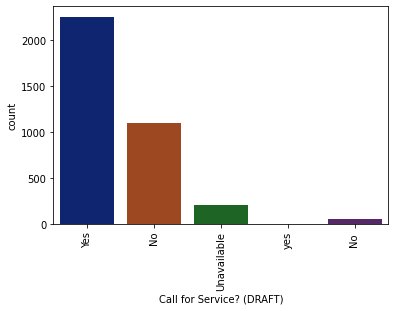

In [7]:
# specify more columns to exclude for univariate distributions
more_exclusions = ["Victim's age", 
"Cause of death", 
"Official disposition of death (justified or other)", 
"Alleged Weapon (Source: WaPo and Review of Cases Not Included in WaPo Database)", 
"Encounter Type (DRAFT)", 
"Initial Reported Reason for Encounter (DRAFT)", 
"Criminal Charges?",
"Race of Officers Involved (DRAFT)"]

# univariate distributions
for column in df.columns:
    if column not in exclusions and column not in useless_columns and column not in more_exclusions:
        sns.countplot(x=df[column], data=df, palette = 'dark')
        plt.xticks(rotation='vertical')
        plt.show()

### Takeaways
- There are a couple of unnecessary columns (begin with `Unnamed:`).
- Messy column names need to be renamed for better readability.
- A lot of columns are not needed due to nulls/unusable and will need to be dropped. 
- Most values in each column have a wide variety of text variation. These should be lowercased, stripped, grouped. 
- Many nulls in dataset that need to be filled in or dropped.
- Dummy variables and encoding needs to be done to pretty much all of the dataset in order to model/evaluate. 
- Possibly a good idea to create age bins.
- Possible exploration with time series, so will be setting datetime index.


***
# Data Preparation

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=258e71fc-cf2b-48c3-8461-70ecd9787aa1' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>